In [51]:
import pandas as pd
from tensorflow.python.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
tf.enable_eager_execution()
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [3]:
#df=pd.read_csv("https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv")
#df.to_csv("credit_cards_dataset.csv")
df=pd.read_csv("credit_cards_dataset.csv")
df.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
df['BILL_AMT']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['PAY_AMT']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
print(df.columns)
#print(df.head())

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'BILL_AMT', 'PAY_AMT'],
      dtype='object')


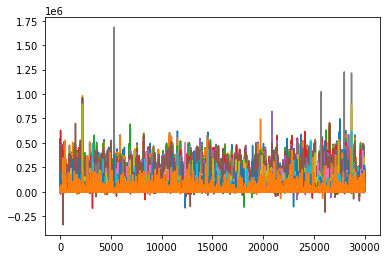

In [15]:
bill_amt=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
pay_amt=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
target=tf.Variable(df['default'])
plt.plot(bill_amt)
plt.plot(pay_amt)

In [19]:
inputs=np.array(bill_amt)
print(inputs)
dense1 = keras.layers.Dense(6, activation='relu')(inputs)
dense2 = keras.layers.Dense(2, activation='relu')(dense1)
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)
error = target[:5] - outputs.numpy()[:5]
print(error)

[[ 3913.  3102.   689.     0.     0.     0.]
 [ 2682.  1725.  2682.  3272.  3455.  3261.]
 [29239. 14027. 13559. 14331. 14948. 15549.]
 ...
 [ 3565.  3356.  2758. 20878. 20582. 19357.]
 [-1645. 78379. 76304. 52774. 11855. 48944.]
 [47929. 48905. 49764. 36535. 32428. 15313.]]
tf.Tensor(
[[ 0  0 -1 -1 -1]
 [ 0  0 -1 -1 -1]
 [ 0  0 -1 -1 -1]
 [ 0  0 -1 -1 -1]
 [ 0  0 -1 -1 -1]], shape=(5, 5), dtype=int32)


In [43]:
print("a multiclass can have targets with more than one value")
print("In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education.")

neuron_count=5
NUMERIC=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']


inputs=np.array(df[NUMERIC])

dense1 = keras.layers.Dense(neuron_count, activation='sigmoid')(inputs)
dense2 = keras.layers.Dense(5, activation='relu')(dense1)
outputs = keras.layers.Dense(6, activation='softmax')(dense2)
print(outputs.numpy()[:5])

a multiclass can have targets with more than one value
In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education.
[[0.12886856 0.20855056 0.19291733 0.19485279 0.1296958  0.14511496]
 [0.12886856 0.20855056 0.19291733 0.19485279 0.1296958  0.14511496]
 [0.12886856 0.20855056 0.19291733 0.19485279 0.1296958  0.14511496]
 [0.12886856 0.20855056 0.19291733 0.19485279 0.1296958  0.14511496]
 [0.12886856 0.20855056 0.19291733 0.19485279 0.1296958  0.14511496]]


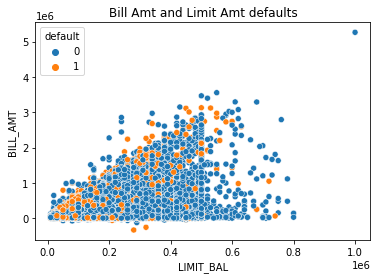

In [56]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT',hue='default', data=df)
plt.title("Bill Amt and Limit Amt defaults")
plt.show()

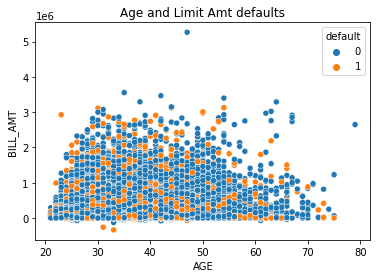

In [57]:
sns.scatterplot(x='AGE',y='BILL_AMT',hue='default', data=df)
plt.title("Age and Limit Amt defaults")
plt.show()